<a href="https://colab.research.google.com/github/akashsharma-2002/OBJECT_DETECTION_WITHOUT_MACHINE_LEARNING/blob/main/Object_detection_without_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object detection without using machine learning/ deep learning model.

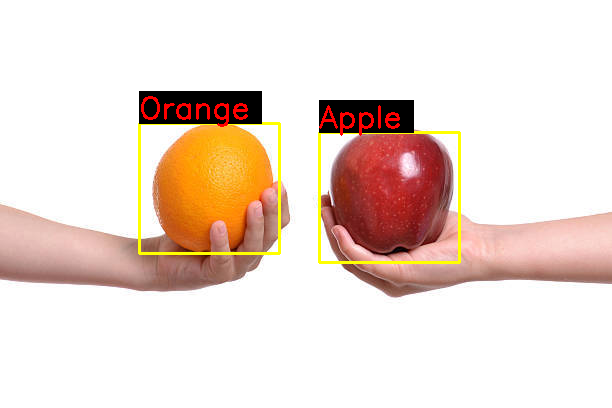

In [35]:
#importing necessary package
import cv2
from google.colab.patches import cv2_imshow

#This function returns the name of the fruit along with the lower and upper HSV color range for that fruit.
def color(n):
    if n == 0:
        name = "Orange"
        hsv_lower = (5, 100, 100)
        hsv_upper = (25, 255, 255)
        return (name, hsv_lower, hsv_upper)
    if n == 1:
        name = "Apple"
        hsv_lower = (0, 100, 100)
        hsv_upper = (10, 255, 255)
        return (name, hsv_lower, hsv_upper)


#This line loads image in frame and convert BGR to HSV color range for the fruit.
frame = cv2.imread("image_1.jpg")
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


"""This loop iterates for i in the range from 0 to 1 ,Then, it creates a binary mask using cv2.inRange(),
then it finds contours in the mask using cv2.findContours()."""
for i in range(2):
    name, hsv_lower, hsv_upper = color(i)
    mask = cv2.inRange(hsv, hsv_lower, hsv_upper)
    conts, herirarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Check if contours were found before proceeding
    if conts:
        biggest = sorted(conts, key=cv2.contourArea, reverse=True)[0]
        rect = cv2.boundingRect(biggest)
        x, y, w, h = rect

        #adjusting height and weight of rectangular box at prediction
        h=130
        w=140

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)

        # Draw a black rectangle as background for the text
        text_size, _ = cv2.getTextSize(name, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
        cv2.rectangle(frame, (x, y - text_size[1] - 10), (x + text_size[0] + 10, y), (0, 0, 0), -1)

        cv2.putText(frame, name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()
